In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd

In [2]:
df = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/Data/DAP.csv', sep=',')

In [3]:
plateifu_list = ['7815-3701', '7815-6102', '7957-12703', '7977-12702', '7991-9102', '8078-6101', '8082-12704',
                '8086-6101', '8131-1902', '8131-3703', '8131-3704', '8131-6103', '8131-12705', '8132-6103',
                '8132-12701', '8133-6103', '8133-9102', '8133-12705', '8134-3701', '8134-3702', '8134-9101',
                '8137-9101', '8141-6104', '8146-6104', '8155-6103', '8155-9101', '8155-12705', '8156-6103',
                '8239-12701', '8244-3704', '8244-6103', '8247-9102', '8254-6101', '8254-6103', '8256-12704',
                '8257-6104', '8274-12704 (Data in DAP missing)', '8325-12704', '8326-9101', 
                '8329-3703 (Data in DAP missing)', '8329-12705', '8330-12705','8332-6102', '8333-3703', 
                '8333-6104', '8333-12702', '8333-12704', '8338-12705', '8440-6101', '8440-12702', '8447-6102',
                '8447-6104', '8450-3701', '8451-12701 (Data in DAP missing)', '8452-3703', '8454-1902', 
                '8454-9101', '8458-6103', '8458-9101', '8462-3702', '8465-6101', '8466-6101', '8483-6104', 
                '8484-9101', '8486-3701', '8547-1902', '8554-6102', '8554-6103', '8554-9102', '8555-3702', 
                '8555-3704 (Data in DAP missing)', '8555-6102', '8555-6103', '8555-12701', '8555-12704',
                '8566-6101', '8588-3701 (Data in DAP missing)', '8592-6103', '8592-12703', '8592-12705', 
                '8595-6101', '8595-9101', '8597-3701', '8600-9101', '8600-9102 (Data in DAP missing)', 
                '8603-12701', '8606-6102', '8606-12704', '8615-12704', '8616-3702', '8616-3703', '8616-12703',
                '8618-12705', '8623-3703', '8714-12701', '8715-12702', '8717-6104', '8717-12702', '8720-9101',
                '8720-12701', '8720-12702', '8720-12705', '8721-3701', '8721-3704', '8725-6101', '8725-12704',
                '8728-3703', '8728-6102', '8942-3702', '8943-3703', '8943-3704', '8943-6104', '8943-12705',
                '8946-6104', '8946-12703', '8946-12705', '8947-3704', '8948-1902', '8979-6103', '8979-12702',
                '8980-12702', '8987-12701', '9042-6104', '9042-12705', '10001-6101']

In [4]:
plateifu_list2 = ['7815-6103', '7991-12705', '7992-9102', '8081-3701','8132-3701',
                 '8132-6101', '8132-12703', '8133-12704', '8135-1902', '8137-3702',
                 '8143-6101', '8244-9102', '8244-12701', '8244-12704', '8259-12705',
                 '8261-12702', '8263-3702', '8318-6102', '8329-6102', '8439-3703',
                 '8439-3704', '8448-3703', '8454-6102', '8454-12704',
                 '8455-6103', '8464-6101', '8466-6104', '8484-12701', '8486-3704',
                 '8552-6103', '8552-9102', '8606-12703', '8616-12701', '8618-3702',
                 '8714-3701', '8717-1901', '8717-1902', '8717-6103', '8721-12703',
                 '8948-6104', '8948-9102', '8978-12702 (Data in DAP missing)',
                 '8979-9102', '9041-3701', '9049-1901']

In [5]:
plateifu = plateifu_list2[44]
# plateifu

In [6]:
data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu}-LOGCUBE.fits.gz')

In [7]:
mangaid_index = np.where(df['plateifu'] == plateifu)[0][0]
mangaid_index

165

In [8]:
mangaid = df.loc[mangaid_index]['mangaid']
nsa_z = df.loc[mangaid_index]['nsa_z']
mangaid, nsa_z

('1-269632', 0.131457)

In [9]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
wave = data['WAVE'].data

16 16


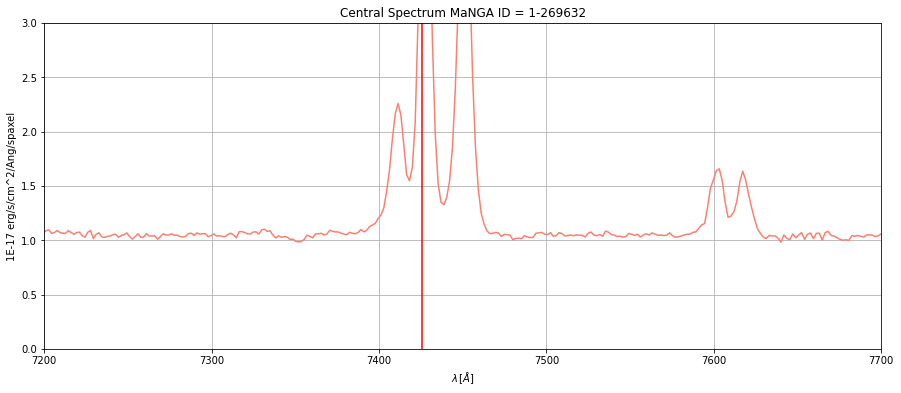

In [10]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

print(x_center, y_center) 

plt.figure(figsize = (15, 6)) 
plt.grid()

plt.ylim(0,3)
plt.xlim(7200,7700)

plt.plot(wave, flux[x_center, y_center], color = 'salmon')

plt.xlabel('$\lambda \, [\AA]$')

plt.ylabel(flux_header['BUNIT'])

plt.title(f'Central Spectrum MaNGA ID = {mangaid}')

plt.axvline(6563*(1+nsa_z), color = 'red')

plt.show()

In [11]:
do_not_use = (mask & 2**10) != 0

In [12]:
n = len(flux) 
sumflux = np.zeros(4563) 
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j] 
        sumflux = np.add(sumflux, flux[i,j])
        

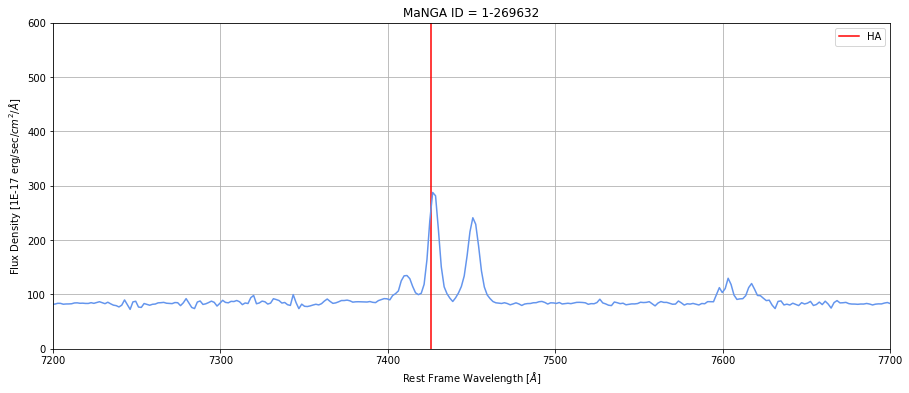

In [13]:
plt.figure(figsize = (15,6))
plt.grid()

plt.ylim(0, 600)
plt.xlim(7200, 7700)

plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title(f'MaNGA ID = {mangaid}')
plt.axvline(6563*(1+nsa_z), color = 'red', label = 'HA')
# plt.axvline(6549*(1+nsa_z), color = 'deeppink', label = 'NII')
# plt.axvline(6585*(1+nsa_z), color = 'green', label = 'NII')
plt.legend()

plt.plot(wave, sumflux, color = 'cornflowerblue')

In [14]:
plateifu

'9049-1901'

In [15]:
ha_list = ['8133-12705', '8137-9101', '8256-12704', '8616-3703', '8720-12702', '8721-3701']

ha_list_uncertain = ['8155-6103', '8254-6103', '8338-12705', '8606-12704']

ha_list2 = ['7815-6103', '7991-12705', '7992-9102', '8132-6101', '8132-12703', '8133-12704', '8135-1902',
           '8137-3702', '8143-6101', '8244-12704', '8318-6102', '8329-6102', '8439-3703', '8448-3703',
            '8464-6101', '9049-1901']

ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [24]:
np.where(df['plateifu'] == ha_list[0])

(array([24]),)

In [29]:
lst = []
for i in ha_list2:
    idx = np.where(df['plateifu'] == i)[0][0]
    lst.append((i, df['nsa_z'][idx]))
lst

[('7815-6103', 0.135043),
 ('7991-12705', 0.113153),
 ('7992-9102', 0.119399),
 ('8132-6101', 0.129403),
 ('8132-12703', 0.116056),
 ('8133-12704', 0.134471),
 ('8135-1902', 0.117997),
 ('8137-3702', 0.131997),
 ('8143-6101', 0.126168),
 ('8244-12704', 0.115137),
 ('8318-6102', 0.12908),
 ('8329-6102', 0.142887),
 ('8439-3703', 0.138619),
 ('8448-3703', 0.138746),
 ('8464-6101', 0.125582),
 ('9049-1901', 0.131457)]